# CREDIT EDA CASE STUDY



#### Introduction
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected.

The data provided in this case gives an impression the applicants have applied for home loans.

#### Objective: 

To determine the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default

#### Method of Analysis: Exploratory Data Analysis.

 

### 1.Importing the libraries.

In [4]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [5]:
#import the useful libraries and set pandas rules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',-1)

###  2. Import the datasets

In [6]:
#Read the datasets, previous_application and application data CSV files
prev_appn=pd.read_csv('previous_application.csv')
prev_appn.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
curr_appn=pd.read_csv('application_data.csv')
curr_appn.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 3. Data Cleaning

In [8]:
#1. Routine check on application data and Previous application to understand the structure
# Application data:

curr_appn.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
#Info of current application

curr_appn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
#No of rows and columns in current application

curr_appn.shape

(307511, 122)

In [11]:
#Describing Previous application:

prev_appn.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.048575e+06,1.048575e+06,815566.000000,1.048575e+06,1.048575e+06,4.891790e+05,8.076100e+05,1.048575e+06,1.048575e+06,489179.000000,3721.000000,3721.000000,1.048575e+06,1.048575e+06,815569.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000
mean,1.922775e+06,2.784367e+05,15891.265151,1.742698e+05,1.950000e+05,6.700778e+03,2.262892e+05,1.248486e+01,9.964123e-01,0.079619,0.187177,0.774922,-8.820381e+02,3.183904e+02,15.995639,342387.346201,13833.802031,33614.930898,76591.061435,81985.701661,0.331530
std,5.329366e+05,1.028569e+05,14745.557438,2.910789e+05,3.169407e+05,2.078570e+04,3.134490e+05,3.333140e+00,5.979011e-02,0.107882,0.083343,0.099514,7.792649e+02,7.996734e+03,14.508109,88595.441587,72460.126454,106643.960780,149653.053854,153298.887247,0.470764
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460642e+06,1.893860e+05,6301.350000,1.890000e+04,2.427750e+04,0.000000e+00,5.058000e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.303000e+03,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,0.000000
50%,1.923419e+06,2.788100e+05,11250.000000,7.081650e+04,8.025300e+04,1.624500e+03,1.115116e+05,1.200000e+01,1.000000e+00,0.051062,0.189122,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384448e+06,3.677445e+05,20523.003750,1.800000e+05,2.152395e+05,7.749000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,1.000000,1.000000,-2.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [12]:
#Info of previous application

prev_appn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
SK_ID_PREV                     1048575 non-null int64
SK_ID_CURR                     1048575 non-null int64
NAME_CONTRACT_TYPE             1048575 non-null object
AMT_ANNUITY                    815566 non-null float64
AMT_APPLICATION                1048575 non-null float64
AMT_CREDIT                     1048575 non-null float64
AMT_DOWN_PAYMENT               489179 non-null float64
AMT_GOODS_PRICE                807610 non-null float64
WEEKDAY_APPR_PROCESS_START     1048575 non-null object
HOUR_APPR_PROCESS_START        1048575 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1048575 non-null object
NFLAG_LAST_APPL_IN_DAY         1048575 non-null int64
RATE_DOWN_PAYMENT              489179 non-null float64
RATE_INTEREST_PRIMARY          3721 non-null float64
RATE_INTEREST_PRIVILEGED       3721 non-null float64
NAME_CASH_LOAN_PURPOSE         1048575 non-null object
NAME_CONTRACT

## Data Quality Check

### a) Application Data


In [13]:
# Check percentage of missing values in columns

# Display the columns with missing values in application data. 
def missing_columns(df):                          
    df_colmissing = df.columns[df.isnull().any()]    
    return df_colmissing

# Display columns with percentage of missing values in application data
def percent_missing(dff):                         
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
    
print(missing_columns(curr_appn))
print(percent_missing(curr_appn))


Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [14]:
## Drop columns with large percentage of missing values

curr_appn=curr_appn[curr_appn.columns[curr_appn.isnull().mean() < 0.4]]   # Drop all columns with more than 40% missing values 
                                                                            #as these include unnecessary columns for analysis.
curr_appn.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Shape of current application after droping columns

curr_appn.shape

(307511, 73)

In [16]:
#Percentage of missing values in current application

print(percent_missing(curr_appn))

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
NAME_TYPE_SUITE                0.42 
DEF_60_CNT_SOCIAL_CIRCLE       0.33 
OBS_60_CNT_SOCIAL_CIRCLE       0.33 
DEF_30_CNT_SOCIAL_CIRCLE       0.33 
OBS_30_CNT_SOCIAL_CIRCLE       0.33 
EXT_SOURCE_2                   0.21 
AMT_GOODS_PRICE                0.09 
FLAG_MOBIL                     0.00 
FLAG_WORK_PHONE                0.00 
FLAG_EMP_PHONE                 0.00 
DAYS_REGISTRATION              0.00 
FLAG_CONT_MOBILE               0.00 
FLAG_PHONE                     0.00 
FLAG_EMAIL                     0.00 
CNT_FAM_MEMBERS                0.00 
DAYS_ID_PUBLISH                0.00 
REGION_POPULATION_RELATIVE     0.00 
DAYS_EMPLOYED                  0.00 
AMT_INCOME_TOTAL               0.00 
T

Drop['EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
'NAME_TYPE_SUITE'] as they will not contribute to the analysis.

['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_HOUR'] are being dropped as they will not significantly impact in deciding the number of credit checks made by the client about his credit score before he applied for a loan. However, a monthly and a quarterly credit score enquiry could be a better indicator because applicant is more likely to make credit score enquiries a month before or three months before applying. 


In [17]:
## Drop['EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START'] as they will not contribute to the analysis.

# ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_HOUR'] are being dropped as they will not significantly impact in deciding the number of credit checks made by the client about his credit score before he applied for a loan. However, a monthly and a quarterly credit score enquire could be a better indicator. 

curr_appn.drop(['EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],axis=1,inplace=True)
curr_appn.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Checking the shape of the application data to know if the above operation is performed

curr_appn.shape                         

(307511, 36)

In [19]:
# Add a column 'Age(Years)' in curr_appn in years.
curr_appn['Age(Years)']= (curr_appn['DAYS_BIRTH']//365)*-1  

# Remove 'DAYS_BIRTH' column from the dataframe as this is not needed anymore
curr_appn.drop('DAYS_BIRTH',axis=1,inplace=True)                 
curr_appn.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Age(Years)
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039,-9833.0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,NaN,NaN,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,55


### Missing Value Imputation




In [20]:
#Impute NaN in the missing values on Occupation Type
# There are over 60,000 rows with missing values. Imputing them with mode(i.e laborers) will not be ideal as it will showcase a wrong picture.
#Hence, imputing 'Not Available'

curr_appn['OCCUPATION_TYPE']=curr_appn['OCCUPATION_TYPE'].fillna(value='Not Available')


In [21]:
#Imputing median for missing values in AMT_REQ_CREDIT_BUREAU_MON and AMT_REQ_CREDIT_BUREAU_QRT since these have the data of the frequencies 
#of number of enquiries made to the Credit Bureau by the applicant before applying. These variables could be indicators of an applicant's confidence to apply. 

curr_appn['AMT_REQ_CREDIT_BUREAU_MON']=curr_appn['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=curr_appn['AMT_REQ_CREDIT_BUREAU_MON'].median())
curr_appn['AMT_REQ_CREDIT_BUREAU_QRT']=curr_appn['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=curr_appn['AMT_REQ_CREDIT_BUREAU_QRT'].median())


In [22]:
#Printing the percentage missing of current application

print(percent_missing(curr_appn))

DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.09
Age(Years)                     0.00
AMT_INCOME_TOTAL               0.00
NAME_FAMILY_STATUS             0.00
NAME_EDUCATION_TYPE            0.00
NAME_INCOME_TYPE               0.00
AMT_ANNUITY                    0.00
AMT_CREDIT                     0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
REGION_POPULATION_RELATIVE     0.00
FLAG_OWN_CAR                   0.00
CODE_GENDER                    0.00
NAME_CONTRACT_TYPE             0.00
TARGET                         0.00
NAME_HOUSING_TYPE              0.00
DAYS_REGISTRATION              0.00
DAYS_EMPLOYED                  0.00
AMT_REQ_CREDIT_BUREAU_QRT      0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
REG_REGION_NOT_LIVE_REGION  

In [23]:
# Dropping the rows with missing values in columns with 0.33% and 0.09% as they will not make any significant impact on the analysis.

curr_appn=curr_appn[curr_appn['DEF_60_CNT_SOCIAL_CIRCLE'].notna()]
curr_appn=curr_appn[curr_appn['AMT_GOODS_PRICE'].notna()]


In [24]:
#Info of current application

curr_appn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306212 entries, 0 to 307510
Data columns (total 36 columns):
SK_ID_CURR                     306212 non-null int64
TARGET                         306212 non-null int64
NAME_CONTRACT_TYPE             306212 non-null object
CODE_GENDER                    306212 non-null object
FLAG_OWN_CAR                   306212 non-null object
FLAG_OWN_REALTY                306212 non-null object
CNT_CHILDREN                   306212 non-null int64
AMT_INCOME_TOTAL               306212 non-null float64
AMT_CREDIT                     306212 non-null float64
AMT_ANNUITY                    306200 non-null float64
AMT_GOODS_PRICE                306212 non-null float64
NAME_INCOME_TYPE               306212 non-null object
NAME_EDUCATION_TYPE            306212 non-null object
NAME_FAMILY_STATUS             306212 non-null object
NAME_HOUSING_TYPE              306212 non-null object
REGION_POPULATION_RELATIVE     306212 non-null float64
DAYS_EMPLOYED          

In [25]:
curr_appn.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Age(Years)
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,Core staff,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039,-9833.0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.0,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,55


In [26]:
#Convert float data type and relevant object data type variables to int, wherever required 
#to present the dataframe in the right format

curr_appn[['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']]=curr_appn[['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']].astype(int)
curr_appn.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Age(Years)
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,Laborers,1,2,2,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,0,0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,Core staff,2,1,1,0,0,0,0,0,0,School,1,0,1,0,0,0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,Laborers,1,2,2,0,0,0,0,0,0,Government,0,0,0,0,0,0,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-3039,-9833.0,Laborers,2,2,2,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,0,0,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,Core staff,1,2,2,0,0,0,0,1,1,Religion,0,0,0,0,0,0,55


In [27]:
# As number of days is in negative, they do not seem to be in the right format, they have to be converted to absolute values.

curr_appn['DAYS_EMPLOYED']=curr_appn['DAYS_EMPLOYED'].abs()
curr_appn['DAYS_REGISTRATION']=curr_appn['DAYS_REGISTRATION'].abs()
curr_appn.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Age(Years)
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648.0,Laborers,1,2,2,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,0,0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,Core staff,2,1,1,0,0,0,0,0,0,School,1,0,1,0,0,0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,4260.0,Laborers,1,2,2,0,0,0,0,0,0,Government,0,0,0,0,0,0,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,3039,9833.0,Laborers,2,2,2,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,0,0,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,3038,4311.0,Core staff,1,2,2,0,0,0,0,1,1,Religion,0,0,0,0,0,0,55


## 3. Data Analysis

In [28]:
#Count of Genders

curr_appn.CODE_GENDER.value_counts()

F      201604
M      104604
XNA    4     
Name: CODE_GENDER, dtype: int64

In [29]:
#Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

curr_appn.loc[curr_appn['CODE_GENDER']=='XNA','CODE_GENDER']='F'
curr_appn['CODE_GENDER'].value_counts()

F    201608
M    104604
Name: CODE_GENDER, dtype: int64

In [30]:
#Count of Family Status

curr_appn['NAME_FAMILY_STATUS'].value_counts()

Married                 195670
Single / not married    45168 
Civil marriage          29656 
Separated               19685 
Widow                   16033 
Name: NAME_FAMILY_STATUS, dtype: int64

In [31]:
#Replacing Unknown with the mode as it is categorical

curr_appn.loc[curr_appn['NAME_FAMILY_STATUS']=='Unknown','NAME_FAMILY_STATUS']='Married'
curr_appn['NAME_FAMILY_STATUS'].value_counts()

Married                 195670
Single / not married    45168 
Civil marriage          29656 
Separated               19685 
Widow                   16033 
Name: NAME_FAMILY_STATUS, dtype: int64

In [32]:
#Count of Education type 

curr_appn['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    217672
Higher education                 74346 
Incomplete higher                10222 
Lower secondary                  3808  
Academic degree                  164   
Name: NAME_EDUCATION_TYPE, dtype: int64

In [33]:
#Removing secondary special from the column as it is unnecessary

curr_appn['NAME_EDUCATION_TYPE']= curr_appn.NAME_EDUCATION_TYPE.apply(lambda x: x.split(' / ')[0])

In [34]:
#Checking if the action was performed

curr_appn['NAME_EDUCATION_TYPE'].value_counts()

Secondary            217672
Higher education     74346 
Incomplete higher    10222 
Lower secondary      3808  
Academic degree      164   
Name: NAME_EDUCATION_TYPE, dtype: int64

In [35]:
#Count of Family Status

curr_appn['NAME_FAMILY_STATUS'].value_counts()

Married                 195670
Single / not married    45168 
Civil marriage          29656 
Separated               19685 
Widow                   16033 
Name: NAME_FAMILY_STATUS, dtype: int64

In [36]:
#Removing Not Married from the column as it is unnecessary

curr_appn['NAME_FAMILY_STATUS']= curr_appn.NAME_FAMILY_STATUS.apply(lambda x: x.split(' / ')[0])

In [37]:
curr_appn['NAME_FAMILY_STATUS'].value_counts()

Married           195670
Single            45168 
Civil marriage    29656 
Separated         19685 
Widow             16033 
Name: NAME_FAMILY_STATUS, dtype: int64

In [38]:
curr_appn.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Age(Years)
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary,Single,House / apartment,0.018801,637,3648.0,Laborers,1,2,2,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,0,0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1188,1186.0,Core staff,2,1,1,0,0,0,0,0,0,School,1,0,1,0,0,0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary,Single,House / apartment,0.010032,225,4260.0,Laborers,1,2,2,0,0,0,0,0,0,Government,0,0,0,0,0,0,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary,Civil marriage,House / apartment,0.008019,3039,9833.0,Laborers,2,2,2,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,0,0,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary,Single,House / apartment,0.028663,3038,4311.0,Core staff,1,2,2,0,0,0,0,1,1,Religion,0,0,0,0,0,0,55


In [39]:
#Count of Housing Type

curr_appn.NAME_HOUSING_TYPE.value_counts()

House / apartment      271726
With parents           14781 
Municipal apartment    11134 
Rented apartment       4854  
Office apartment       2603  
Co-op apartment        1114  
Name: NAME_HOUSING_TYPE, dtype: int64

In [40]:
#Removing Apartment from the column as it is unnecessary

curr_appn['NAME_HOUSING_TYPE']= curr_appn.NAME_HOUSING_TYPE.apply(lambda x: x.split(' / ')[0])

In [41]:
curr_appn.NAME_HOUSING_TYPE.value_counts()

House                  271726
With parents           14781 
Municipal apartment    11134 
Rented apartment       4854  
Office apartment       2603  
Co-op apartment        1114  
Name: NAME_HOUSING_TYPE, dtype: int64

In [42]:
curr_appn.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Age(Years)
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary,Single,House,0.018801,637,3648.0,Laborers,1,2,2,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,0,0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House,0.003541,1188,1186.0,Core staff,2,1,1,0,0,0,0,0,0,School,1,0,1,0,0,0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary,Single,House,0.010032,225,4260.0,Laborers,1,2,2,0,0,0,0,0,0,Government,0,0,0,0,0,0,53
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary,Civil marriage,House,0.008019,3039,9833.0,Laborers,2,2,2,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,0,0,53
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary,Single,House,0.028663,3038,4311.0,Core staff,1,2,2,0,0,0,0,1,1,Religion,0,0,0,0,0,0,55


## Handling Outliers

In [43]:
# Descibing the AMT_INCOME_TOTAL variable in curr_appn
# Converting the income to 1000s for better understanding.

curr_appn['AMT_INCOME_TOTAL']=curr_appn['AMT_INCOME_TOTAL']/1000
curr_appn.AMT_INCOME_TOTAL.describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, .95, .99])

count    306212.000000
mean     168.665370   
std      237.358579   
min      25.650000    
5%       67.500000    
25%      112.500000   
50%      146.250000   
75%      202.500000   
90%      270.000000   
95%      337.500000   
99%      459.668835   
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

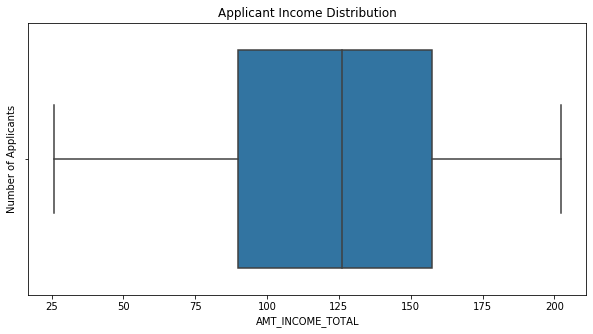

In [44]:
#ploting the boxplot of AMT_INCOME_TOTAL variable.

plt.figure(figsize=[10,5])
q3 = curr_appn['AMT_INCOME_TOTAL'].quantile(0.75)
df = curr_appn[curr_appn['AMT_INCOME_TOTAL']<q3]
plt.ylabel('Number of Applicants')
plt.title('Applicant Income Distribution')

sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

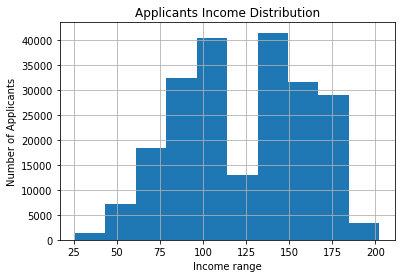

In [45]:
#Create a histogram for the AMT_INCOME_TOTAL variable for a clearer picture of the distribution:

df_filtered= curr_appn[(curr_appn['AMT_INCOME_TOTAL']<q3)]
df_filtered['AMT_INCOME_TOTAL'].hist()
plt.ylabel('Number of Applicants')
plt.xlabel('Income range')
plt.title('Applicants Income Distribution')
plt.show()

In [46]:
# Descibing the AMT_CREDIT variable in curr_appn

# Converting the credit to 1000s for better understanding.

curr_appn['AMT_CREDIT']=curr_appn['AMT_CREDIT']/1000
(curr_appn.AMT_CREDIT.describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, .95, .99]))

count    306212.000000
mean     599.797287   
std      402.574843   
min      45.000000    
5%       135.000000   
25%      270.000000   
50%      517.500000   
75%      808.650000   
90%      1133.748000  
95%      1350.000000  
99%      1862.802000  
max      4050.000000  
Name: AMT_CREDIT, dtype: float64

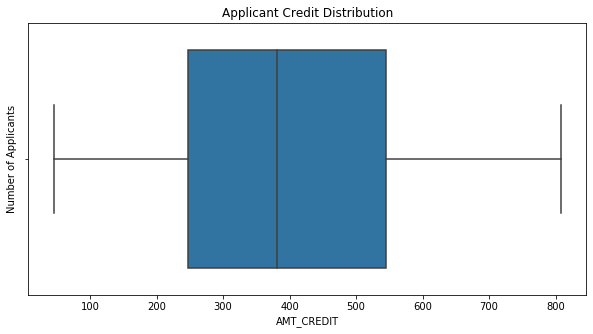

In [47]:
plt.figure(figsize=[10,5])
q3_credit = curr_appn['AMT_CREDIT'].quantile(0.75)
df = curr_appn[curr_appn['AMT_CREDIT']<q3_credit]
plt.ylabel('Number of Applicants')
plt.title('Applicant Credit Distribution')

sns.boxplot(df.AMT_CREDIT)
plt.show()

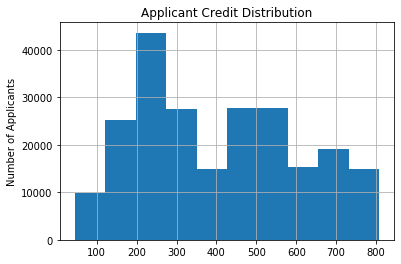

In [48]:
#Create a histogram for the AMT_CREDIT variable for a clearer picture of the distribution:
df_credit= curr_appn[(curr_appn['AMT_CREDIT']<q3_credit)]
df_credit['AMT_CREDIT'].hist()
plt.ylabel('Number of Applicants')
plt.title('Applicant Credit Distribution')
plt.show()

In [49]:
curr_appn.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Age(Years)
0,100002,1,Cash loans,M,N,Y,0,202.5,406.5975,24700.5,351000.0,Working,Secondary,Single,House,0.018801,637,3648.0,Laborers,1,2,2,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,0,0,26
1,100003,0,Cash loans,F,N,N,0,270.0,1293.5025,35698.5,1129500.0,State servant,Higher education,Married,House,0.003541,1188,1186.0,Core staff,2,1,1,0,0,0,0,0,0,School,1,0,1,0,0,0,46
2,100004,0,Revolving loans,M,Y,Y,0,67.5,135.0000,6750.0,135000.0,Working,Secondary,Single,House,0.010032,225,4260.0,Laborers,1,2,2,0,0,0,0,0,0,Government,0,0,0,0,0,0,53
3,100006,0,Cash loans,F,N,Y,0,135.0,312.6825,29686.5,297000.0,Working,Secondary,Civil marriage,House,0.008019,3039,9833.0,Laborers,2,2,2,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,0,0,53
4,100007,0,Cash loans,M,N,Y,0,121.5,513.0000,21865.5,513000.0,Working,Secondary,Single,House,0.028663,3038,4311.0,Core staff,1,2,2,0,0,0,0,1,1,Religion,0,0,0,0,0,0,55


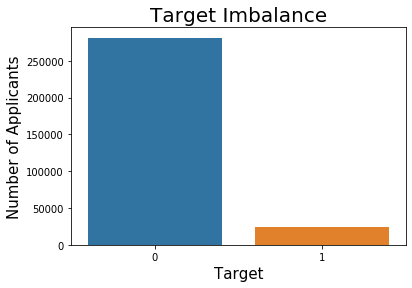

In [50]:
sns.countplot(curr_appn['TARGET'])
plt.title('Target Imbalance',fontsize=20)
plt.xlabel('Target',fontsize=15)
plt.ylabel('Number of Applicants',fontsize=15)
plt.show()

The countplot above shows that there are approximately 20000 applicants who have difficulty paying back loans. However, a significant number of applicants do not face such issues.

In [51]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

T1 = curr_appn.loc[curr_appn["TARGET"]==1]
T2 = curr_appn.loc[curr_appn["TARGET"]==0]

In [52]:
#Shape of T1

T1.shape

(24768, 36)

In [53]:
# Mean of Income total of T1 variable

round(T1['AMT_INCOME_TOTAL'].mean(),2)

165.69

In [54]:
#Shape of T2

T2.shape

(281444, 36)

In [55]:
# Mean of Income total of T2 dataframe 

round(T2['AMT_INCOME_TOTAL'].mean(),2)

168.93

In [56]:
#Imbalance Ratio:

round(len(T2)/len(T1),2)

11.36

In [57]:
# Calculating Imbalance percentage

round(100*curr_appn['TARGET'].value_counts()/len(curr_appn),2)

0    91.91
1    8.09 
Name: TARGET, dtype: float64

### **Univariate analysis for categories**

In [58]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 22
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 10 + 5*len(temp.unique())
    fig.set_size_inches(width , 10)
    plt.xticks(rotation=45)

    plt.yscale('log')
    plt.ylabel('Number of Applicants',fontsize=15)
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='rainbow') 
        
    plt.show()

In [59]:
bins_thousands = [0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500]

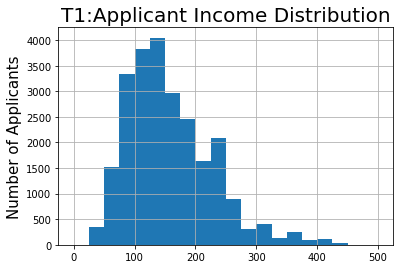

In [60]:
# PLotting for income range

T1_q3 = T1['AMT_INCOME_TOTAL'].quantile(0.99)
T1_filtered= T1[(T1['AMT_INCOME_TOTAL']<T1_q3)]
T1_filtered['AMT_INCOME_TOTAL'].hist(bins=bins_thousands )
plt.ylabel('Number of Applicants',fontsize=15)
plt.title('T1:Applicant Income Distribution',fontsize=20)
plt.show()

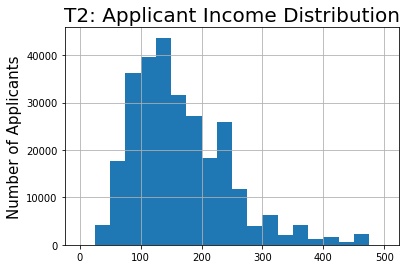

In [61]:
# PLotting for income range

T2_q3 = T2['AMT_INCOME_TOTAL'].quantile(0.99)
T2_filtered= T2[(T2['AMT_INCOME_TOTAL']<T2_q3)]
T2_filtered.AMT_INCOME_TOTAL.hist(bins=bins_thousands )
plt.ylabel('Number of Applicants',fontsize=15)
plt.title('T2: Applicant Income Distribution',fontsize=20)
plt.show()

#### Points to be concluded from the above graphs.

1. From the histogram plotted for T1:Applicant Income Distribution, it can be concluded that a majority of applicants who have either payment difficulties or defaulted in the past fall in the income range of INR 50,000 to INR 200,000. However,very few applicants with slighlty higher incomes have defaulted.
2. As against the income distribution for T1, the distribution for applicants who have not defaulted(shown by T2:Applicant Income Distribution) concludes that non defaulters have incomes spread across INR 100,000 to INR 280,000.  

Income can be considered as an indicator of a defaulter. However, in this case, it is not strong.

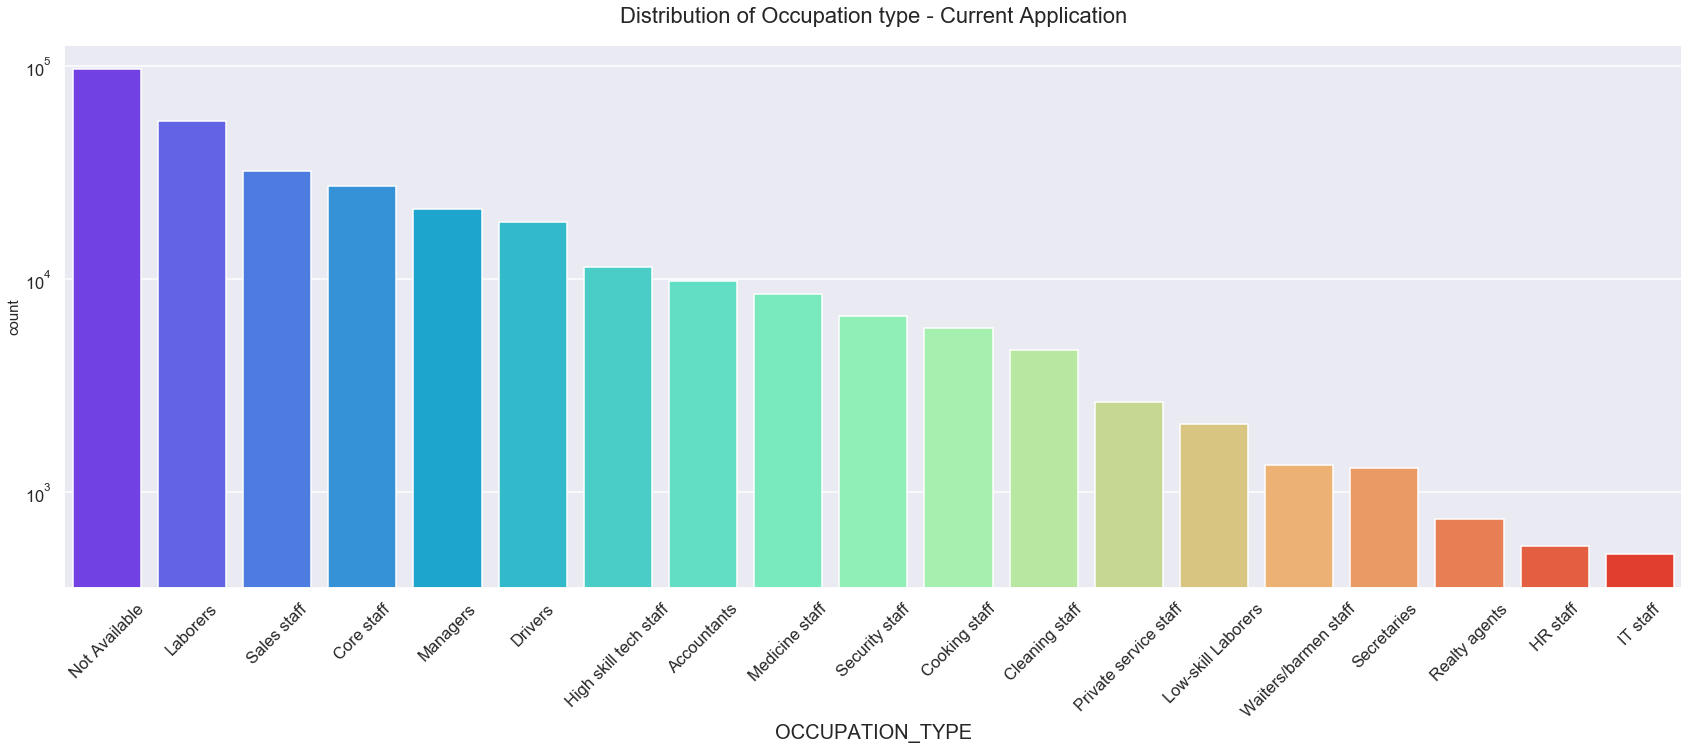

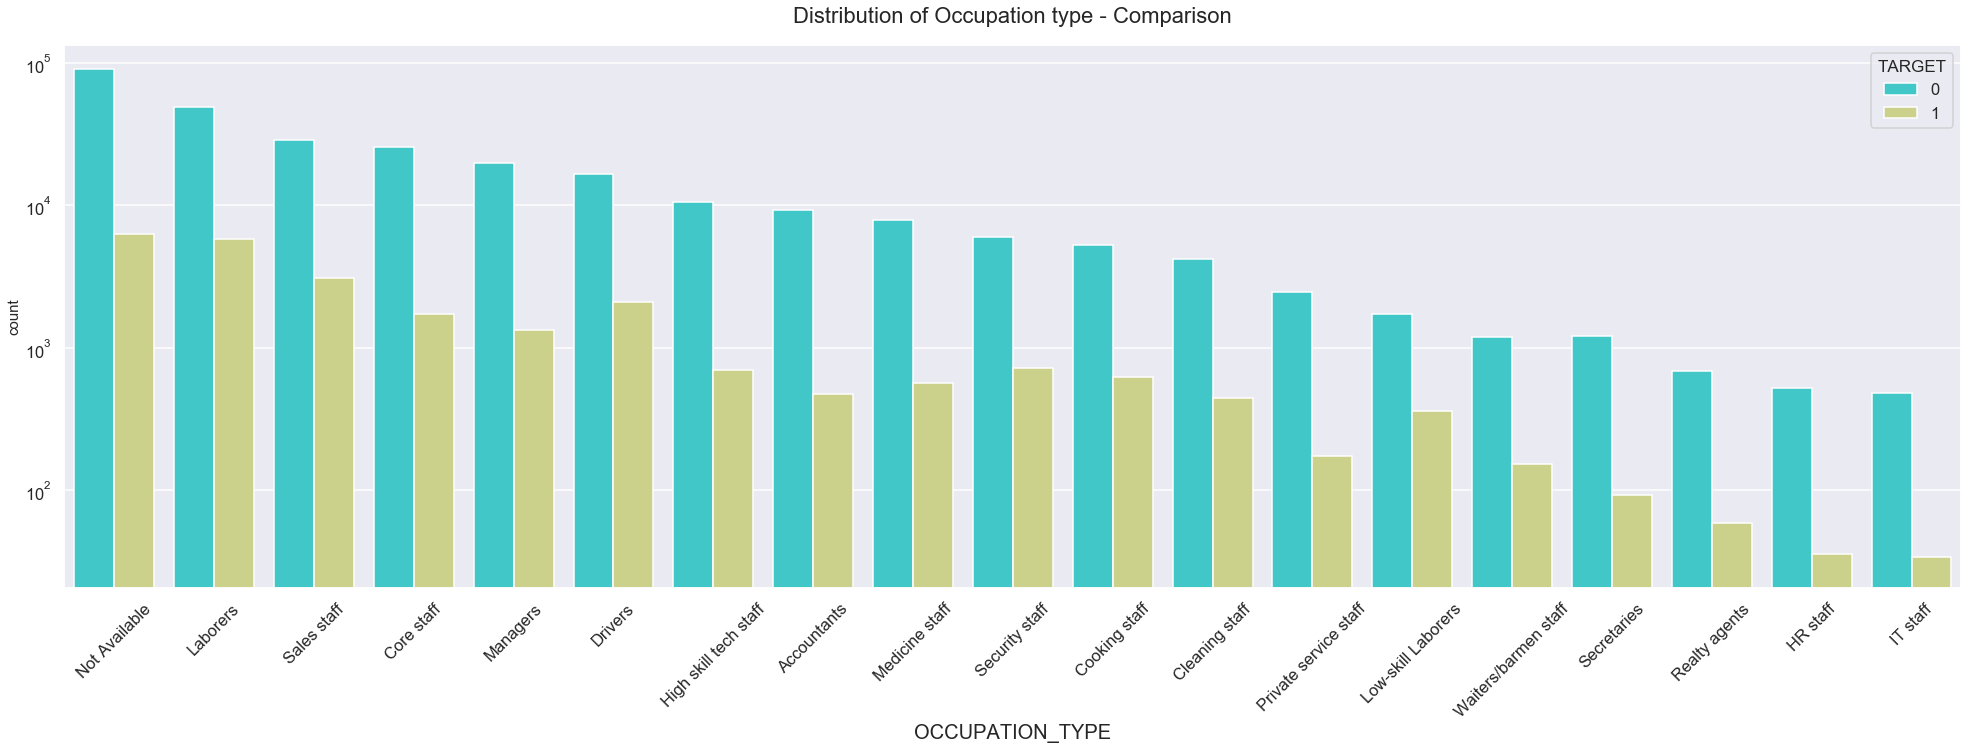

In [62]:
# Plotting for Occupation type

uniplot(curr_appn,col='OCCUPATION_TYPE',title='Distribution of Occupation type - Current Application')
uniplot(curr_appn,col='OCCUPATION_TYPE',title='Distribution of Occupation type - Comparison', hue='TARGET')



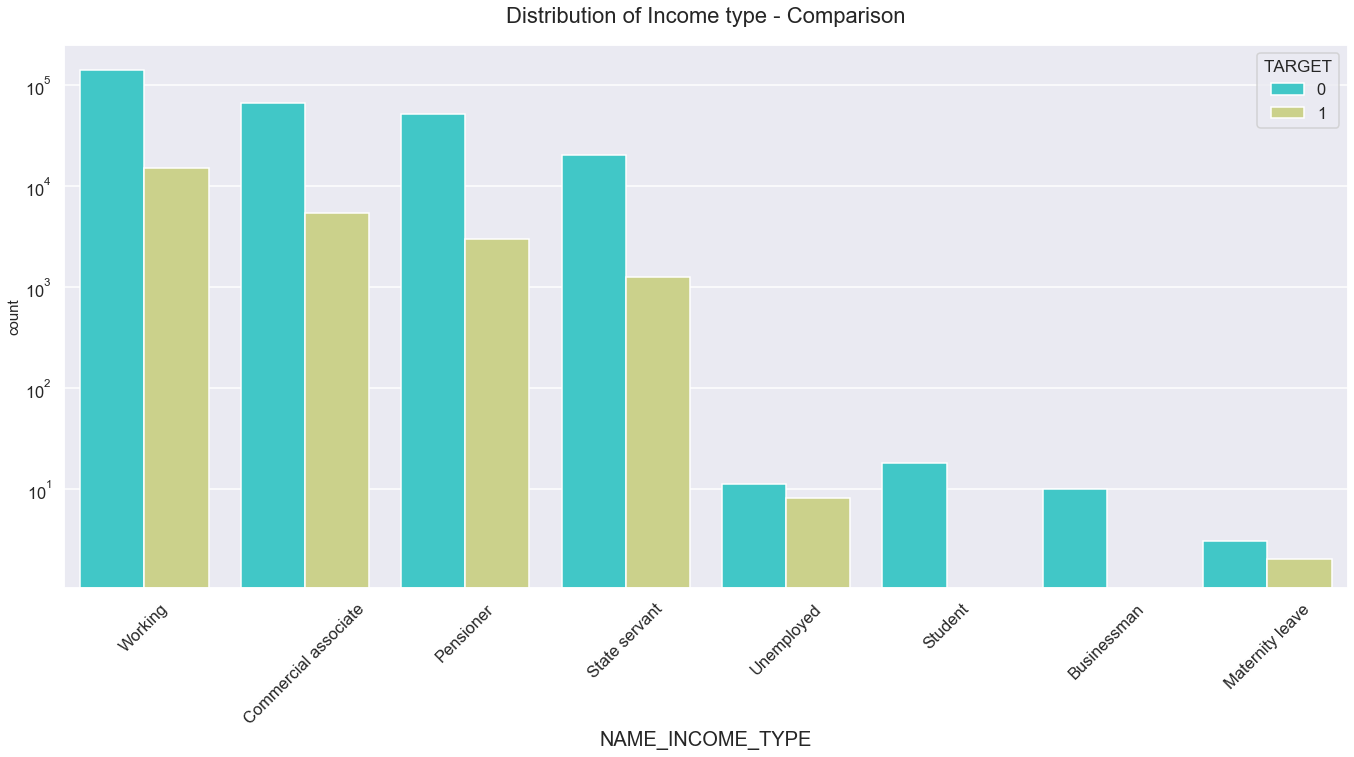

In [63]:
# Plotting for Income type

uniplot(curr_appn,col='NAME_INCOME_TYPE',title='Distribution of Income type - Comparison', hue='TARGET')

#### Points to be concluded from the above graph.

1. From "Distribution of Income type - Comparison" we notice that "Unemployed" people have higher default percentage compared to other income types
2. Also, Student and Businessman have negligile default percentage.


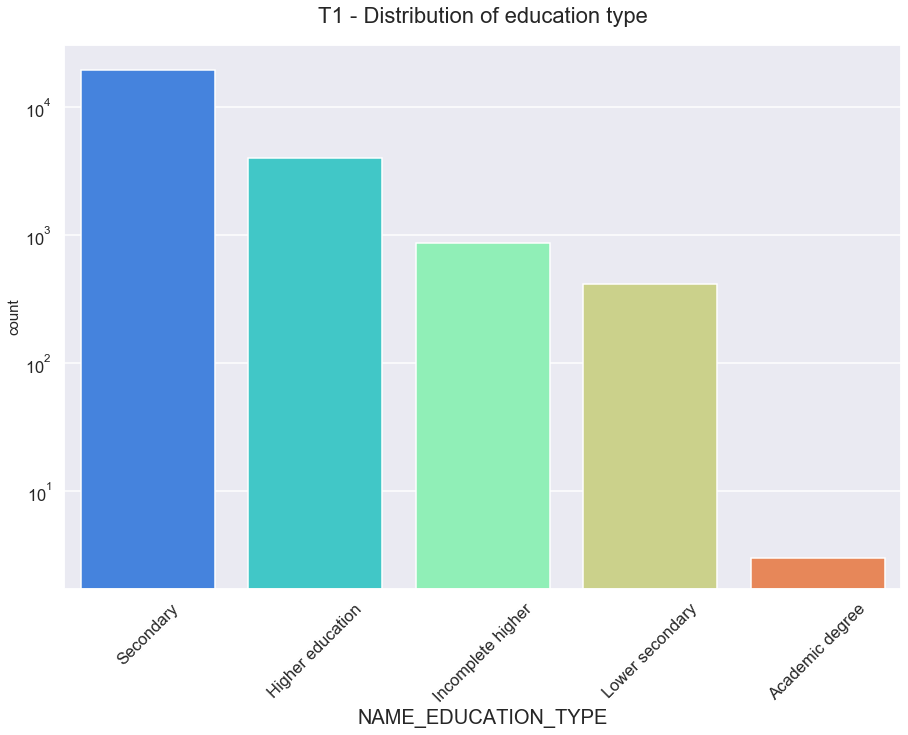

In [64]:
# Plotting for Education type

uniplot(T1,col='NAME_EDUCATION_TYPE',title='T1 - Distribution of education type')

#### Points to be concluded from the above graph.

1. People with "Secondary" education have highest default rate
2. People with "Academic degree"  have lowest default rate

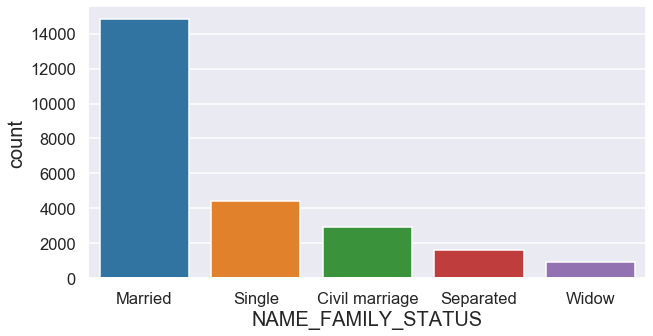

In [65]:
# Plotting for Education type

plt.figure(figsize=(10,5))
sns.countplot(data = T1, x= 'NAME_FAMILY_STATUS', order=T1['NAME_FAMILY_STATUS'].value_counts().index)
plt.show()

#### Points to be concluded from the above graph.

1. Married people are more likely to default
2. Separated and Widow are least likely to default

### Categoroical Biivariate Analysis in logarithmic scale for target=1(client with payment difficulties)

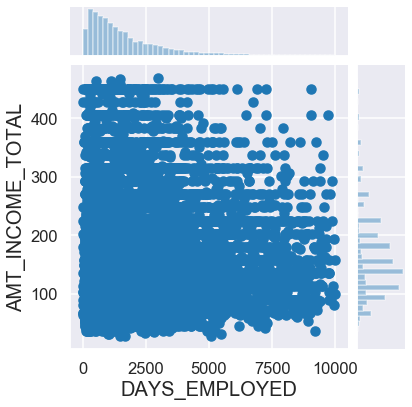

In [66]:
# Bivariate analysis on Income and Days employed

T1_joint = T2['AMT_INCOME_TOTAL'].quantile(0.99)
T1_joint_filtered= T1[(T1['AMT_INCOME_TOTAL']<T2_q3) & (T1['DAYS_EMPLOYED']<10000) ]

sns.jointplot('DAYS_EMPLOYED','AMT_INCOME_TOTAL',T1_joint_filtered)
plt.show()

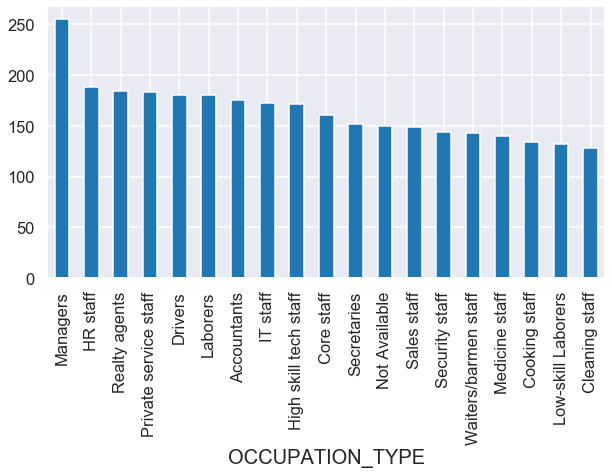

In [67]:
# Plotting for Income type

plt.figure(figsize=(10,5))
T1.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

#### Points to be concluded from the above graph.

1. There are defaulters spread across all occupation types irrespective of their incomes


# Correlation

In [68]:
#Finding correlation of T1 dataframe's numerical columns

T1_corr = T1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_CHILDREN','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_REGISTRATION','REGION_RATING_CLIENT','Age(Years)']].corr()

In [69]:
T1_corr

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,REGION_RATING_CLIENT,Age(Years)
AMT_INCOME_TOTAL,1.000000,0.038043,0.046334,0.037548,0.004777,0.009126,-0.014959,-0.000151,-0.021496,-0.003179
AMT_CREDIT,0.038043,1.000000,0.751619,0.983097,-0.001960,0.069095,0.002212,0.025937,-0.059384,0.135231
AMT_ANNUITY,0.046334,0.751619,1.000000,0.752442,0.030960,0.071620,-0.081103,-0.034357,-0.074047,0.013822
AMT_GOODS_PRICE,0.037548,0.983097,0.752442,1.000000,-0.008480,0.076093,0.006951,0.025806,-0.066440,0.135701
CNT_CHILDREN,0.004777,-0.001960,0.030960,-0.008480,1.000000,-0.032008,-0.192843,-0.149190,0.041147,-0.259319
REGION_POPULATION_RELATIVE,0.009126,0.069095,0.071620,0.076093,-0.032008,1.000000,0.015437,0.056537,-0.443571,0.048125
DAYS_EMPLOYED,-0.014959,0.002212,-0.081103,0.006951,-0.192843,0.015437,1.000000,0.192529,0.003729,0.583063
DAYS_REGISTRATION,-0.000151,0.025937,-0.034357,0.025806,-0.149190,0.056537,0.192529,1.000000,-0.103790,0.288726
REGION_RATING_CLIENT,-0.021496,-0.059384,-0.074047,-0.066440,0.041147,-0.443571,0.003729,-0.103790,1.000000,-0.033781
Age(Years),-0.003179,0.135231,0.013822,0.135701,-0.259319,0.048125,0.583063,0.288726,-0.033781,1.000000


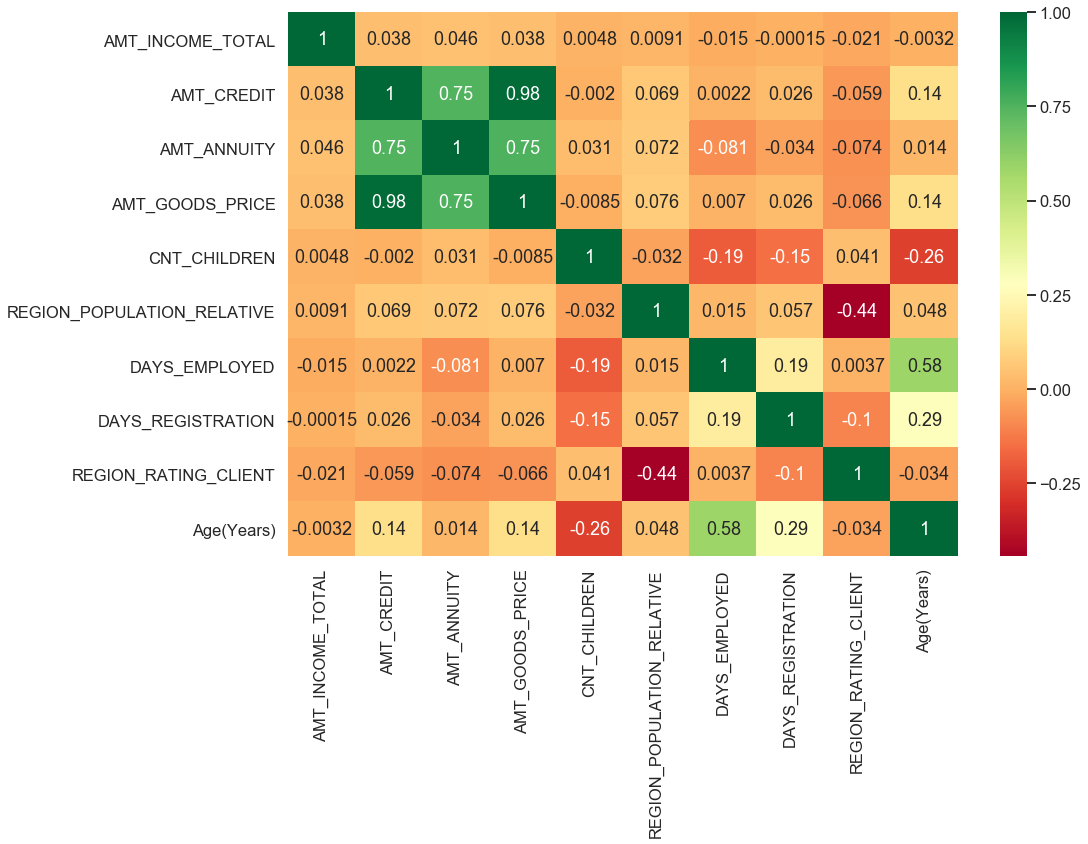

In [70]:
#Plotting Heatmap for T1

plt.figure(figsize=(15,10))
sns.heatmap(T1_corr, annot=True, cmap="RdYlGn")
b, t = plt.ylim()
b += 0.5 
t -= 0.5
plt.ylim(b, t)
plt.show()

#### Observation of T1 heatmap

The correlation chart above indicates a high positive relationship between Amt_Credit and Good_Price. This means as the price of the goods sought by the applicants rise, the credit amount rise proportionately. A similar relationship is seen between credit amount and annuity.
A high negative correlation is seen between CNT_Children and Dats_Employed.

In [71]:
#Finding correlation of T2 dataframe's numerical columns

T2_corr = T2[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_CHILDREN','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_REGISTRATION','REGION_RATING_CLIENT','Age(Years)']].corr()

In [72]:
T2_corr

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,REGION_RATING_CLIENT,Age(Years)
AMT_INCOME_TOTAL,1.000000,0.342323,0.418157,0.348793,0.028203,0.166103,-0.141480,-0.065196,-0.185653,-0.063438
AMT_CREDIT,0.342323,1.000000,0.770329,0.987249,0.003537,0.100679,-0.070894,-0.013490,-0.103404,0.046761
AMT_ANNUITY,0.418157,0.770329,1.000000,0.775812,0.021642,0.120856,-0.106164,-0.039577,-0.132101,-0.013307
AMT_GOODS_PRICE,0.348793,0.987249,0.775812,1.000000,-0.000210,0.103759,-0.069179,-0.015896,-0.104244,0.044305
CNT_CHILDREN,0.028203,0.003537,0.021642,-0.000210,1.000000,-0.024099,-0.245312,-0.185970,0.022771,-0.337458
REGION_POPULATION_RELATIVE,0.166103,0.100679,0.120856,0.103759,-0.024099,1.000000,-0.007395,0.052306,-0.538139,0.025376
DAYS_EMPLOYED,-0.141480,-0.070894,-0.106164,-0.069179,-0.245312,-0.007395,1.000000,0.214815,0.038540,0.626389
DAYS_REGISTRATION,-0.065196,-0.013490,-0.039577,-0.015896,-0.185970,0.052306,0.214815,1.000000,-0.075889,0.333400
REGION_RATING_CLIENT,-0.185653,-0.103404,-0.132101,-0.104244,0.022771,-0.538139,0.038540,-0.075889,1.000000,-0.002415
Age(Years),-0.063438,0.046761,-0.013307,0.044305,-0.337458,0.025376,0.626389,0.333400,-0.002415,1.000000


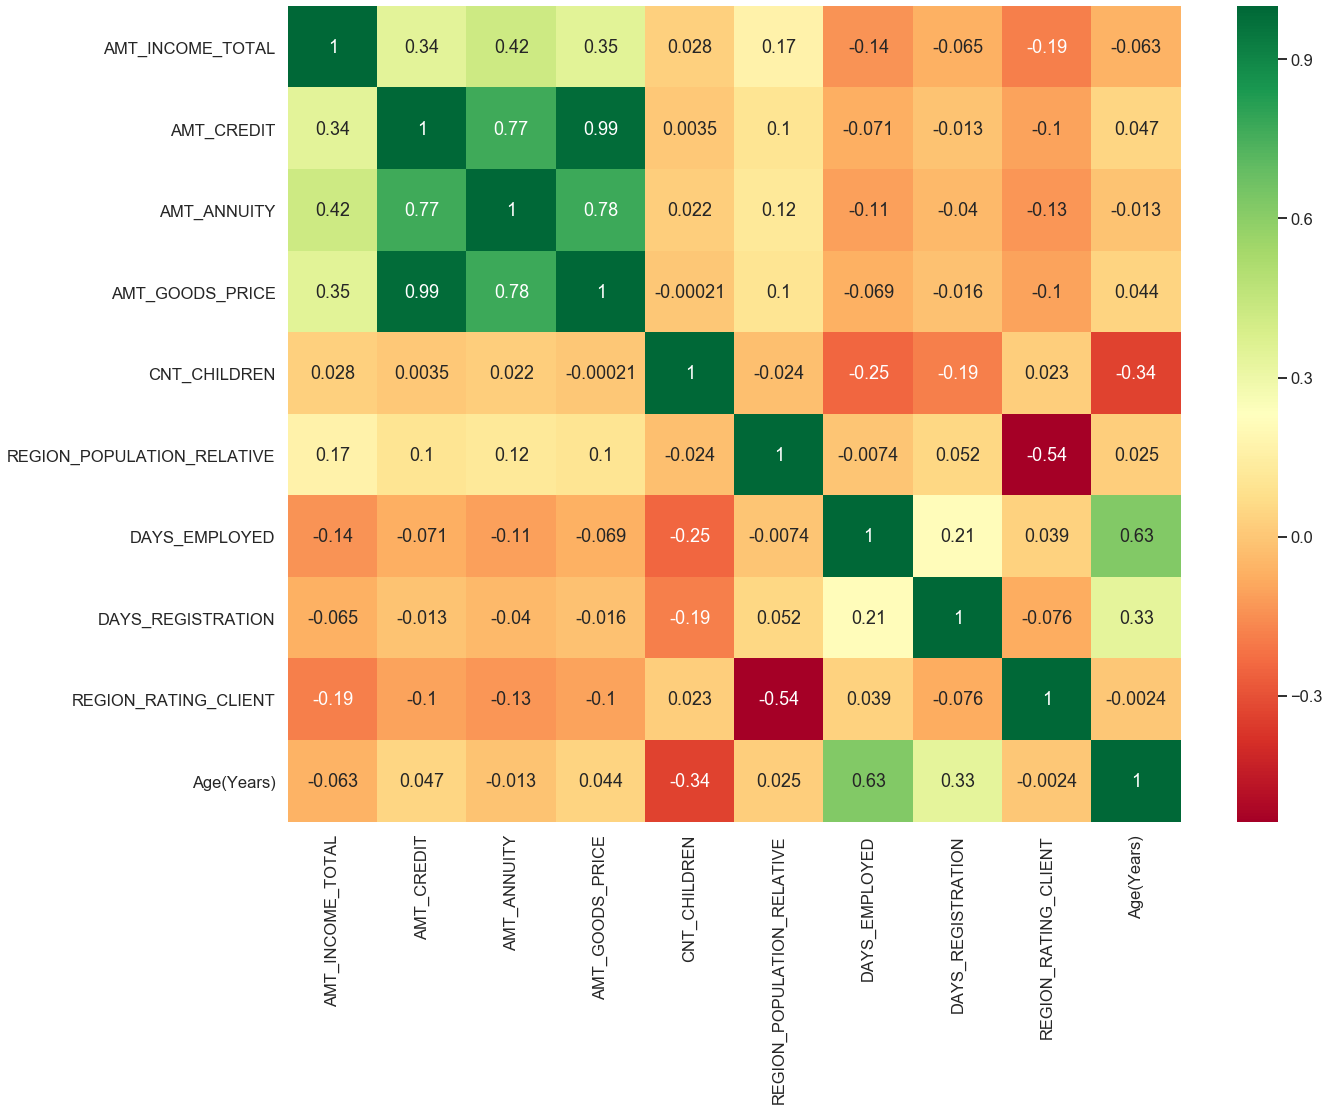

In [73]:
#Plotting Heatmap for T2

plt.figure(figsize=(20, 15))
sns.heatmap(T2_corr, annot=True, cmap="RdYlGn")
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

#### Observation of T2 Heatmap


The correlation chart above indicates a high positive relationship between Amt_Credit and Good_Price (Similar to T1). This means as the price of the goods sought by the applicants rise, the credit amount rise proportionately. A similar relationship is seen between goods price amount and annuity.
A high negative correlation is seen between CNT_Children and Days_Employed.

## b) Previous Application

### Analysis

In [74]:
#Info of previous application

prev_appn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
SK_ID_PREV                     1048575 non-null int64
SK_ID_CURR                     1048575 non-null int64
NAME_CONTRACT_TYPE             1048575 non-null object
AMT_ANNUITY                    815566 non-null float64
AMT_APPLICATION                1048575 non-null float64
AMT_CREDIT                     1048575 non-null float64
AMT_DOWN_PAYMENT               489179 non-null float64
AMT_GOODS_PRICE                807610 non-null float64
WEEKDAY_APPR_PROCESS_START     1048575 non-null object
HOUR_APPR_PROCESS_START        1048575 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1048575 non-null object
NFLAG_LAST_APPL_IN_DAY         1048575 non-null int64
RATE_DOWN_PAYMENT              489179 non-null float64
RATE_INTEREST_PRIMARY          3721 non-null float64
RATE_INTEREST_PRIVILEGED       3721 non-null float64
NAME_CASH_LOAN_PURPOSE         1048575 non-null object
NAME_CONTRACT

In [75]:
#Describing previous application

prev_appn.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.048575e+06,1.048575e+06,815566.000000,1.048575e+06,1.048575e+06,4.891790e+05,8.076100e+05,1.048575e+06,1.048575e+06,489179.000000,3721.000000,3721.000000,1.048575e+06,1.048575e+06,815569.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000
mean,1.922775e+06,2.784367e+05,15891.265151,1.742698e+05,1.950000e+05,6.700778e+03,2.262892e+05,1.248486e+01,9.964123e-01,0.079619,0.187177,0.774922,-8.820381e+02,3.183904e+02,15.995639,342387.346201,13833.802031,33614.930898,76591.061435,81985.701661,0.331530
std,5.329366e+05,1.028569e+05,14745.557438,2.910789e+05,3.169407e+05,2.078570e+04,3.134490e+05,3.333140e+00,5.979011e-02,0.107882,0.083343,0.099514,7.792649e+02,7.996734e+03,14.508109,88595.441587,72460.126454,106643.960780,149653.053854,153298.887247,0.470764
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460642e+06,1.893860e+05,6301.350000,1.890000e+04,2.427750e+04,0.000000e+00,5.058000e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.303000e+03,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,0.000000
50%,1.923419e+06,2.788100e+05,11250.000000,7.081650e+04,8.025300e+04,1.624500e+03,1.115116e+05,1.200000e+01,1.000000e+00,0.051062,0.189122,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384448e+06,3.677445e+05,20523.003750,1.800000e+05,2.152395e+05,7.749000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,1.000000,1.000000,-2.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [76]:
curr_appn.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Age(Years)
0,100002,1,Cash loans,M,N,Y,0,202.5,406.5975,24700.5,351000.0,Working,Secondary,Single,House,0.018801,637,3648.0,Laborers,1,2,2,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,0,0,26
1,100003,0,Cash loans,F,N,N,0,270.0,1293.5025,35698.5,1129500.0,State servant,Higher education,Married,House,0.003541,1188,1186.0,Core staff,2,1,1,0,0,0,0,0,0,School,1,0,1,0,0,0,46
2,100004,0,Revolving loans,M,Y,Y,0,67.5,135.0000,6750.0,135000.0,Working,Secondary,Single,House,0.010032,225,4260.0,Laborers,1,2,2,0,0,0,0,0,0,Government,0,0,0,0,0,0,53
3,100006,0,Cash loans,F,N,Y,0,135.0,312.6825,29686.5,297000.0,Working,Secondary,Civil marriage,House,0.008019,3039,9833.0,Laborers,2,2,2,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,0,0,53
4,100007,0,Cash loans,M,N,Y,0,121.5,513.0000,21865.5,513000.0,Working,Secondary,Single,House,0.028663,3038,4311.0,Core staff,1,2,2,0,0,0,0,1,1,Religion,0,0,0,0,0,0,55


In [77]:
# Change negative values to positive

prev_appn['DAYS_DECISION']=prev_appn['DAYS_DECISION'].abs()

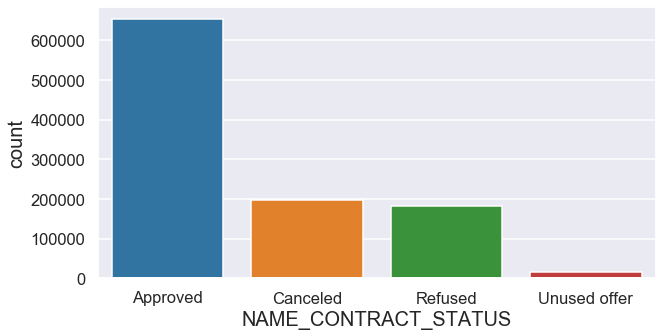

In [78]:
#Plotting contract status of applicants based on previous application

plt.figure(figsize=(10,5))
sns.countplot(data = prev_appn, x= 'NAME_CONTRACT_STATUS', order=prev_appn['NAME_CONTRACT_STATUS'].value_counts().index)
plt.show()

#### Points to be concluded from the above graph.

1. Most loans were Approved
2. Refusals and Canceled have almost a similar rate
3. Very few loans were unused

In [79]:
# Take all loans which were Refused

Prev_Refused = prev_appn.loc[prev_appn["NAME_CONTRACT_STATUS"]=='Refused']

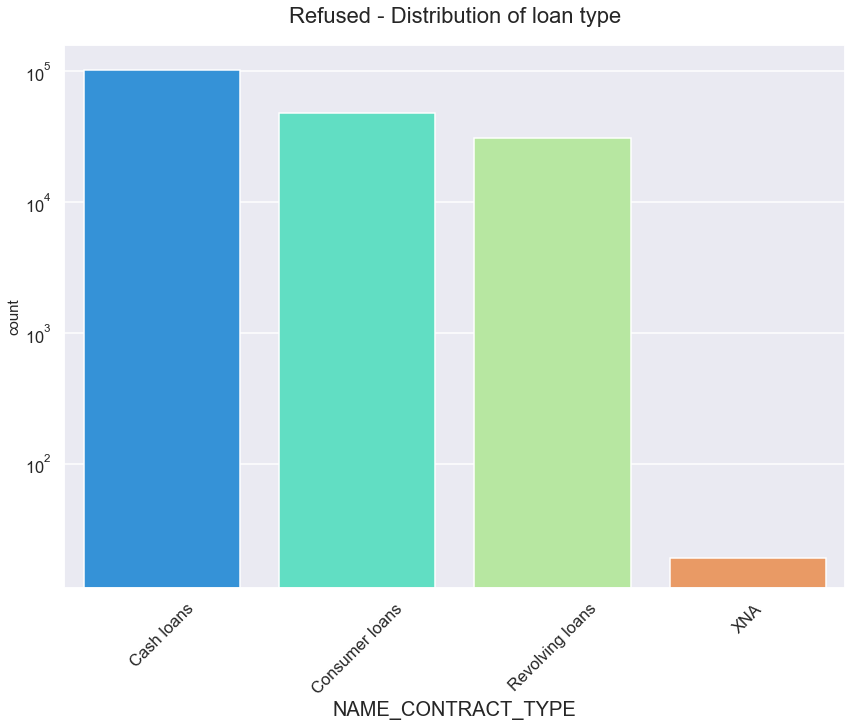

In [80]:
#Plotting distrubution of loan type for Refused loans

uniplot(Prev_Refused,col='NAME_CONTRACT_TYPE',title='Refused - Distribution of loan type')

#### Points to be concluded from the above graph.

1. Cash loans were the most refused ones


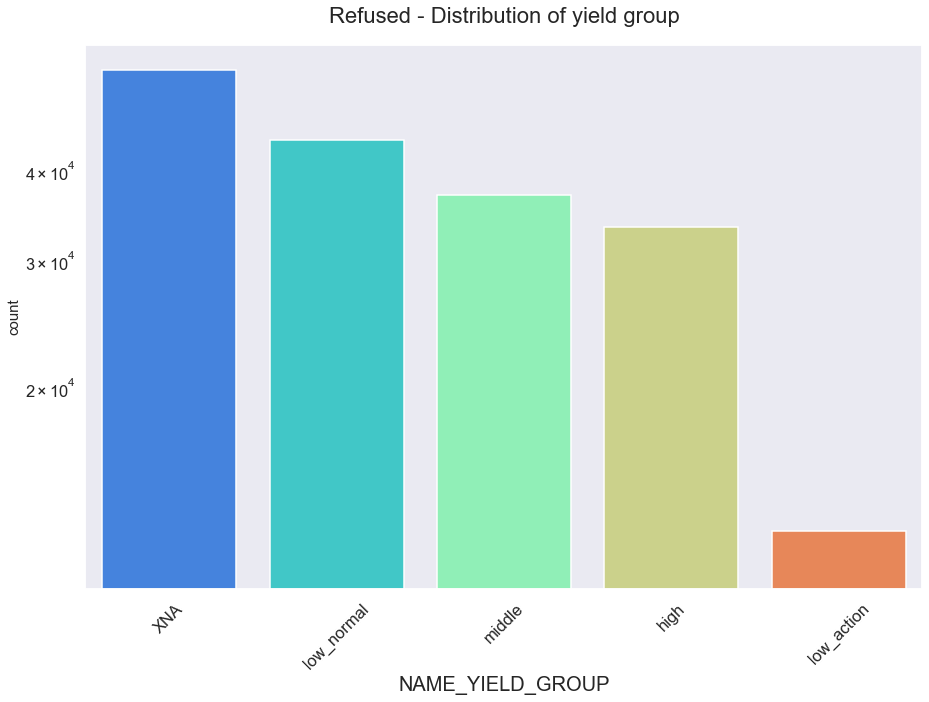

In [81]:
#Plotting Distribution of yield group for refused loans

uniplot(Prev_Refused,col='NAME_YIELD_GROUP',title='Refused - Distribution of yield group')

#### Points to be concluded from the above graph.

1. Low Normal yield group were the most refused ones
2. low_action yeild group have least number of refused loans

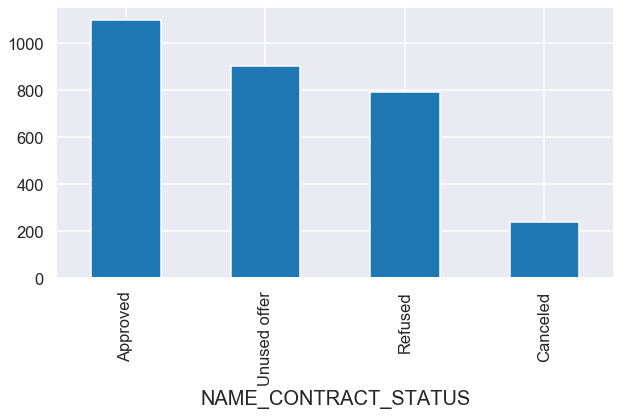

In [82]:
# Compare days required for a decision to be made for each Contract status

plt.figure(figsize=(10,5))
prev_appn.groupby('NAME_CONTRACT_STATUS')['DAYS_DECISION'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

#### Points to be concluded from the above graph.

1. Approved loans take more days for a decision followed by Unused offer (which is also an approved loan but not used).
2. Canceled loans take least days for decision


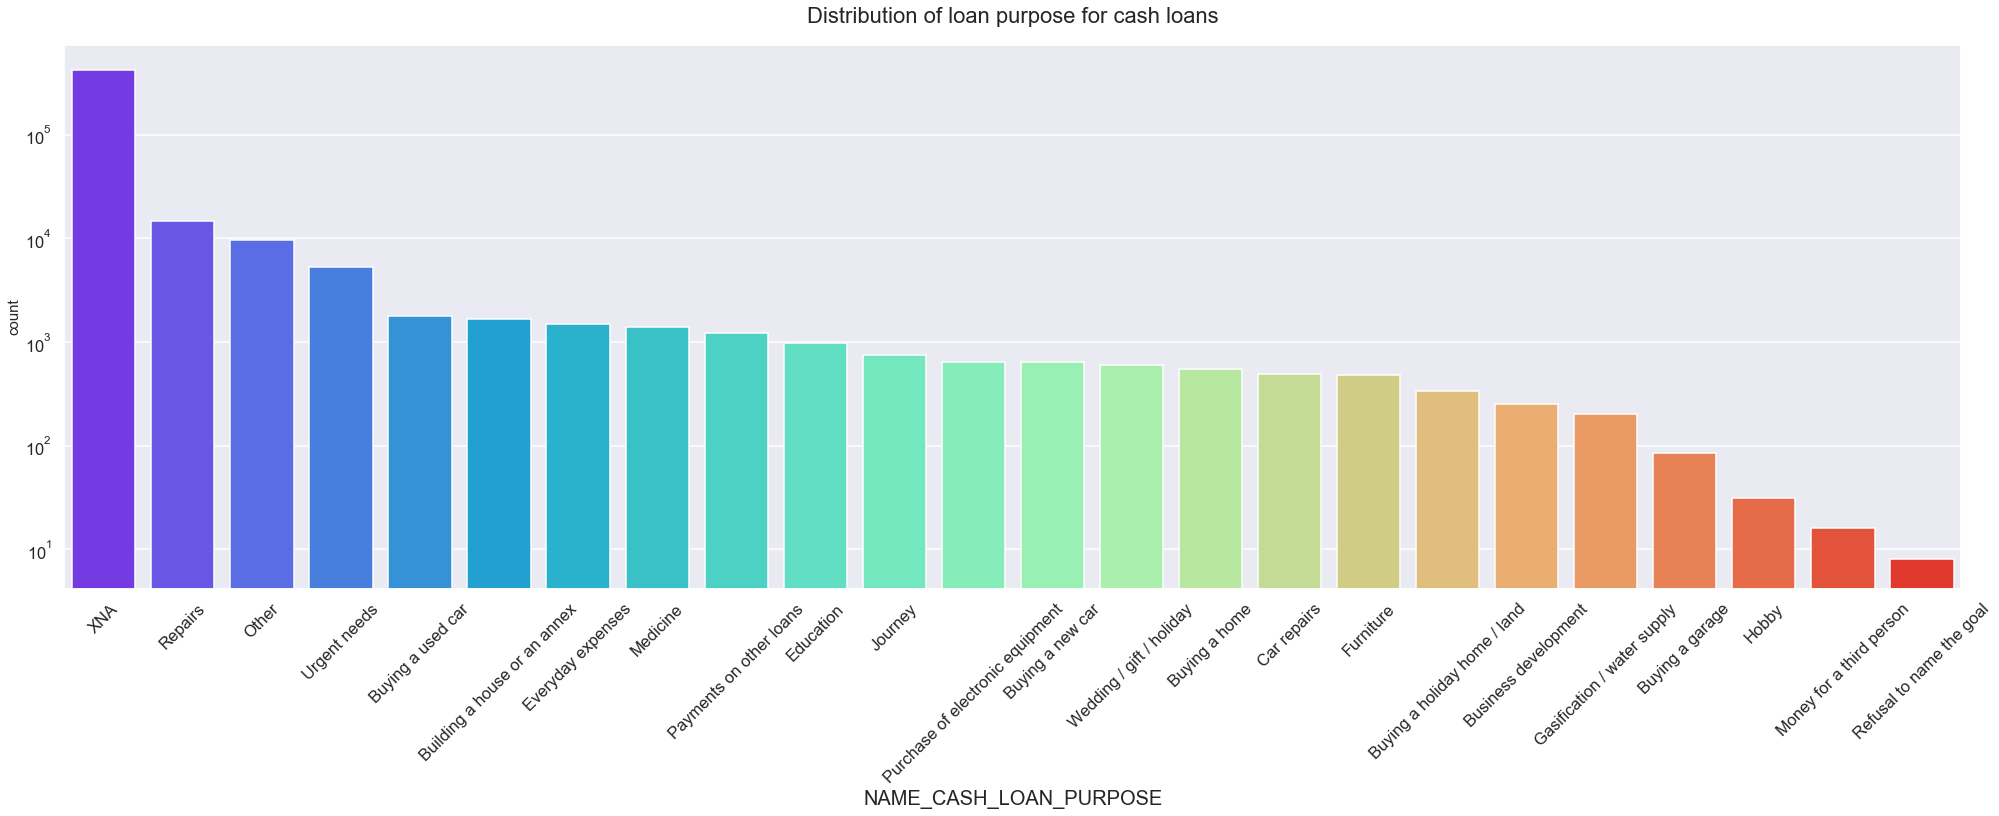

In [83]:
# Distribution of loan purpose for cash loans

Prev_Cash_Loans = prev_appn.loc[prev_appn["NAME_CONTRACT_TYPE"]=='Cash loans']
uniplot(Prev_Cash_Loans,col='NAME_CASH_LOAN_PURPOSE',title='Distribution of loan purpose for cash loans')

#### Points to be concluded from the above graph.

1. For most of the Cash loans, the purpose of the loan is not available(XNA). 
2. If we just look at the cash loans which have a purpose, we see that "Repairs", "Other" and "Urgent needs" constitute a higher percentage


## Data Merge:  Application Data and Previous_Application

In [84]:
# Inner merging the Application dataset with previous appliaction dataset

df_merged=pd.merge(curr_appn,prev_appn,how='inner',on='SK_ID_CURR')
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Age(Years),SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202.5,406.5975,24700.5,351000.0,Working,Secondary,Single,House,0.018801,637,3648.0,Laborers,1,2,2,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,0,0,26,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270.0,1293.5025,35698.5,1129500.0,State servant,Higher education,Married,House,0.003541,1188,1186.0,Core staff,2,1,1,0,0,0,0,0,0,School,1,0,1,0,0,0,46,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270.0,1293.5025,35698.5,1129500.0,State servant,Higher education,Married,House,0.003541,1188,1186.0,Core staff,2,1,1,0,0,0,0,0,0,School,1,0,1,0,0,0,46,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100004,0,Revolving loans,M,Y,Y,0,67.5,135.0000,6750.0,135000.0,Working,Secondary,Single,House,0.010032,225,4260.0,Laborers,1,2,2,0,0,0,0,0,0,Government,0,0,0,0,0,0,53,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
4,100006,0,Cash loans,F,N,Y,0,135.0,312.6825,29686.5,297000.0,Working,Secondary,Civil marriage,House,0.008019,3039,9833.0,Laborers,2,2,2,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,0,0,53,2078043,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,15,Y,1,NaN,NaN,NaN,XNA,Approved,181,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0


In [85]:
#Info of merged dataset

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884625 entries, 0 to 884624
Data columns (total 72 columns):
SK_ID_CURR                     884625 non-null int64
TARGET                         884625 non-null int64
NAME_CONTRACT_TYPE_x           884625 non-null object
CODE_GENDER                    884625 non-null object
FLAG_OWN_CAR                   884625 non-null object
FLAG_OWN_REALTY                884625 non-null object
CNT_CHILDREN                   884625 non-null int64
AMT_INCOME_TOTAL               884625 non-null float64
AMT_CREDIT_x                   884625 non-null float64
AMT_ANNUITY_x                  884565 non-null float64
AMT_GOODS_PRICE_x              884625 non-null float64
NAME_INCOME_TYPE               884625 non-null object
NAME_EDUCATION_TYPE            884625 non-null object
NAME_FAMILY_STATUS             884625 non-null object
NAME_HOUSING_TYPE              884625 non-null object
REGION_POPULATION_RELATIVE     884625 non-null float64
DAYS_EMPLOYED          

In [86]:
#Missing values percent of columns of merged dataset

print(percent_missing(df_merged))

RATE_INTEREST_PRIMARY          99.66
RATE_INTEREST_PRIVILEGED       99.66
RATE_DOWN_PAYMENT              52.76
AMT_DOWN_PAYMENT               52.76
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      39.52
DAYS_TERMINATION               39.52
DAYS_LAST_DUE                  39.52
DAYS_LAST_DUE_1ST_VERSION      39.52
DAYS_FIRST_DUE                 39.52
DAYS_FIRST_DRAWING             39.52
AMT_GOODS_PRICE_y              22.49
AMT_ANNUITY_y                  21.65
CNT_PAYMENT                    21.65
PRODUCT_COMBINATION            0.02 
AMT_ANNUITY_x                  0.01 
OCCUPATION_TYPE                0.00 
CNT_FAM_MEMBERS                0.00 
REG_CITY_NOT_WORK_CITY         0.00 
REGION_RATING_CLIENT           0.00 
REGION_RATING_CLIENT_W_CITY    0.00 
DAYS_EMPLOYED                  0.00 
REG_REGION_NOT_LIVE_REGION     0.00 
REG_REGION_NOT_WORK_REGION     0.00 
LIVE_REGION_NOT_WORK_REGION    0.00 
REG_CITY_NOT_LIVE_CITY         0.00 
DAYS_REGISTRATION              0.00 
N

In [87]:
#Drop columns with high missing values

df_merged.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','NAME_TYPE_SUITE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE','DAYS_FIRST_DRAWING','DAYS_LAST_DUE'],axis=1,inplace=True)

In [88]:
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,Age(Years),SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202.5,406.5975,24700.5,351000.0,Working,Secondary,Single,House,0.018801,637,3648.0,Laborers,1,2,2,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,0,0,26,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270.0,1293.5025,35698.5,1129500.0,State servant,Higher education,Married,House,0.003541,1188,1186.0,Core staff,2,1,1,0,0,0,0,0,0,School,1,0,1,0,0,0,46,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270.0,1293.5025,35698.5,1129500.0,State servant,Higher education,Married,House,0.003541,1188,1186.0,Core staff,2,1,1,0,0,0,0,0,0,School,1,0,1,0,0,0,46,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100004,0,Revolving loans,M,Y,Y,0,67.5,135.0000,6750.0,135000.0,Working,Secondary,Single,House,0.010032,225,4260.0,Laborers,1,2,2,0,0,0,0,0,0,Government,0,0,0,0,0,0,53,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
4,100006,0,Cash loans,F,N,Y,0,135.0,312.6825,29686.5,297000.0,Working,Secondary,Civil marriage,House,0.008019,3039,9833.0,Laborers,2,2,2,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,0,0,53,2078043,Cash loans,24246.000,675000.0,675000.0,675000.0,THURSDAY,15,Y,1,XNA,Approved,181,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low


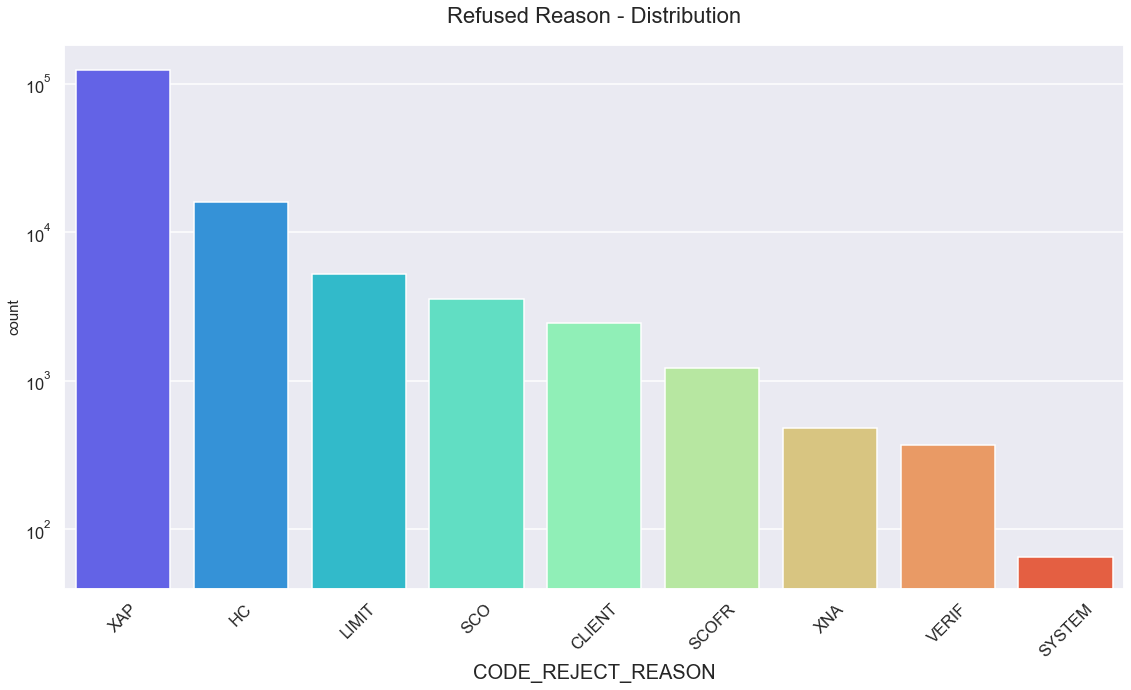

In [89]:
# Take all loans which were Refused

Refused = df_merged.loc[prev_appn["NAME_CONTRACT_STATUS"]=='Refused']
uniplot(Refused,col='CODE_REJECT_REASON',title='Refused Reason - Distribution')

#### Points to be concluded from the above graph.

1. While the reasons for rejections is not available(XAP) for a large number of cases, yet from the data available, "HC" and "LIMIT" are the most prominent reasons
2. Least number of applications are rejected for the reason "SYSTEM" 

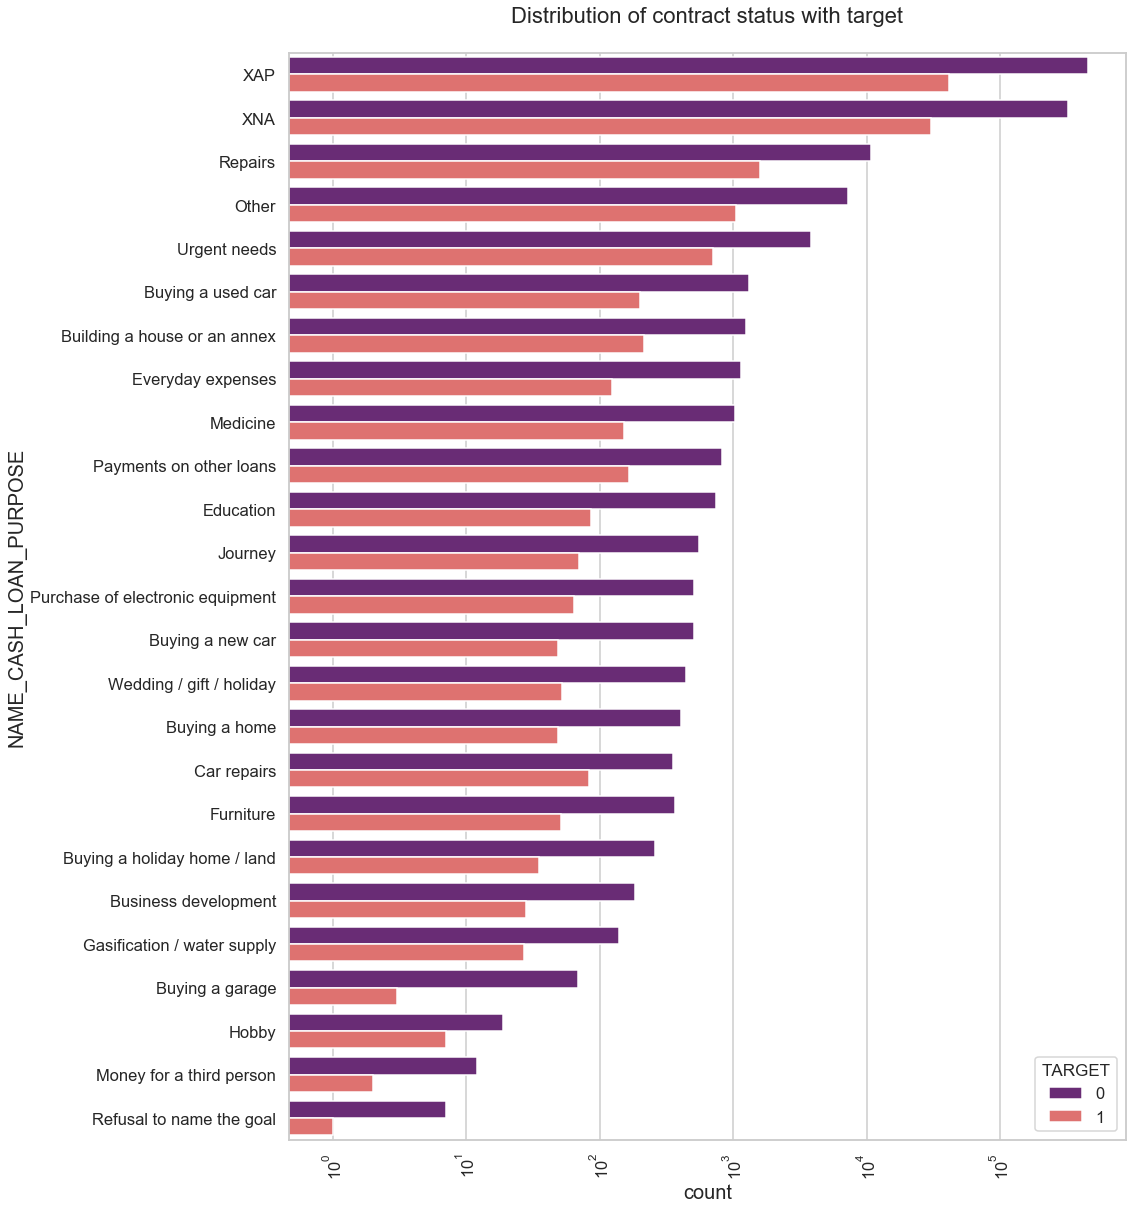

In [90]:
# Distribution of contract status with target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with target')
ax = sns.countplot(data = df_merged, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

#### Few points we can conclude from abpve plot:

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties.
   They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'
#### Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

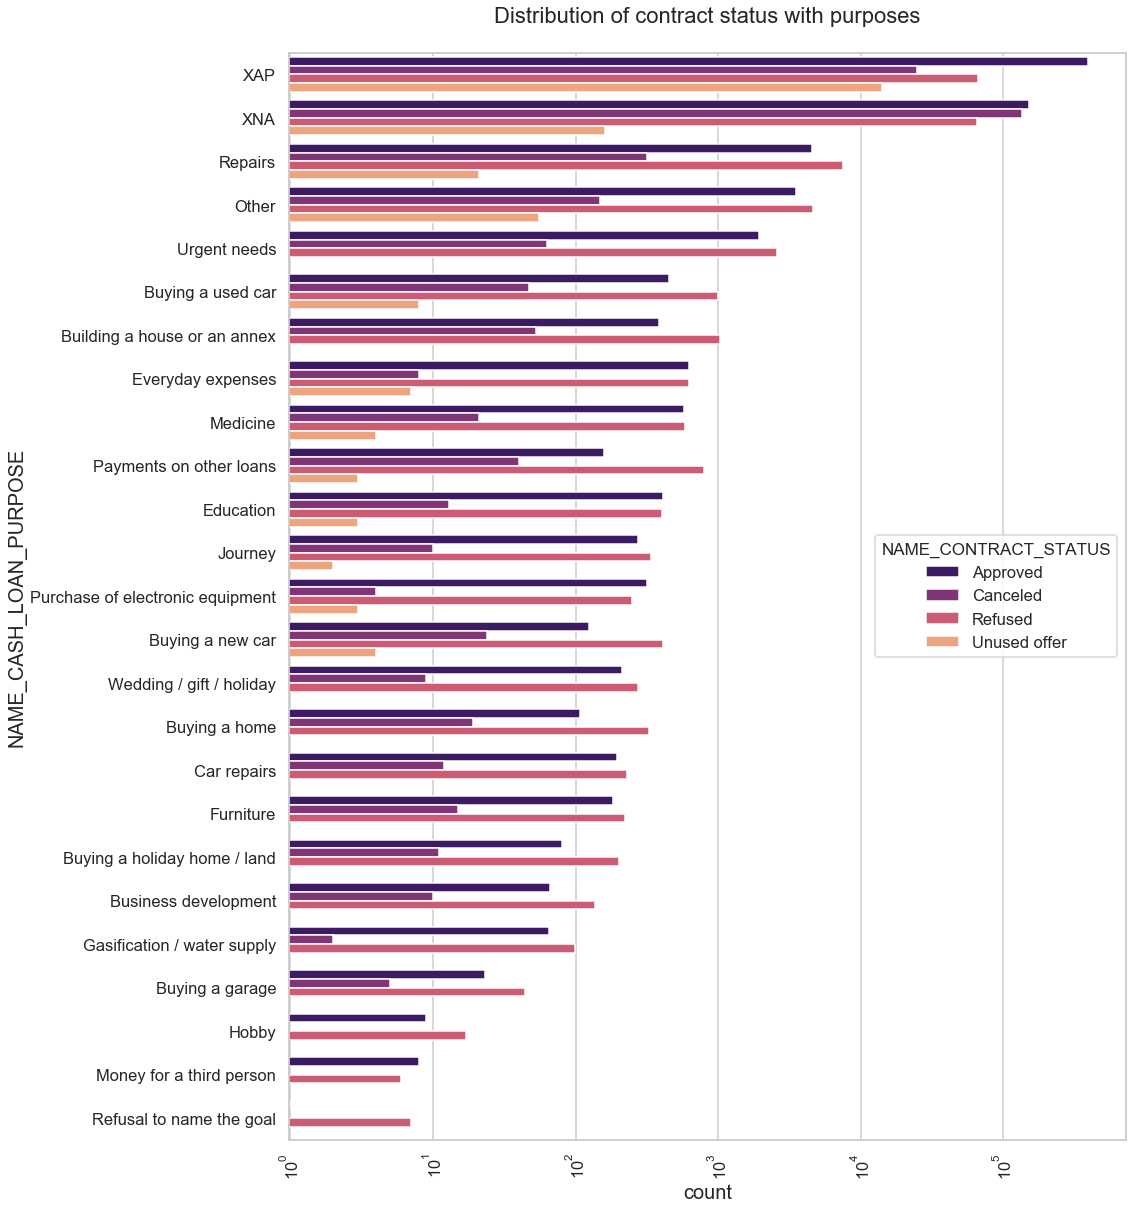

In [91]:
# Distribution of contract status with purposes

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = df_merged, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

#### Points to be concluded from above plot:

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have almost equal number of approves and rejection
3. Paying other loans and buying a new car is having significant higher rejection than approves.

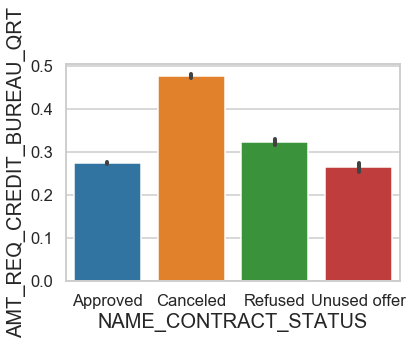

In [92]:
# Bivariate analysis on contract status and AMT_REQ_CREDIT_BUREAU_QRT

sns.barplot(x='NAME_CONTRACT_STATUS',y='AMT_REQ_CREDIT_BUREAU_QRT',data=df_merged)
plt.show()

#### Points to be concluded from the above graph.

1. It can be inferred that applicants who enquired more number of times in the last quarter have a higher cancellation rate


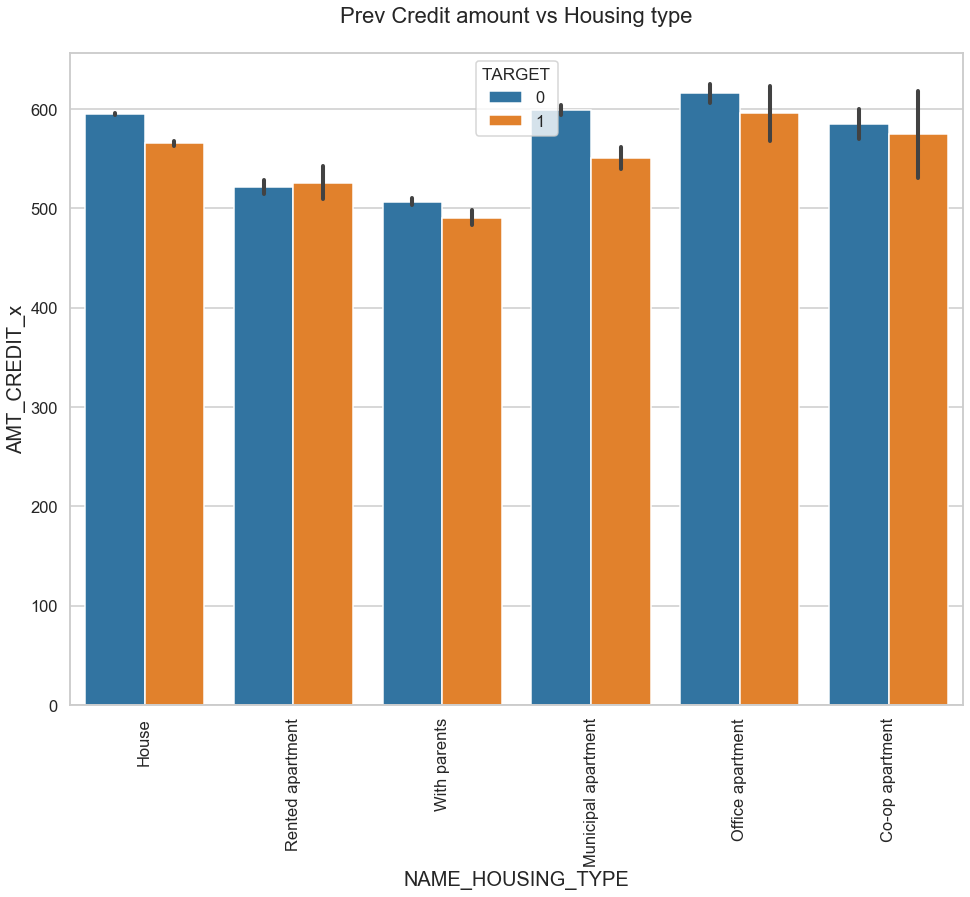

In [93]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =df_merged, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

1. Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
2. So, we can conclude that bank should think before giving loans to the housing type of co-op apartment as they are having difficulties in payment.
3. Others doesnt have any payment difficulties as compared to it

## Findings and Conclusions

The Consumer Finance Company must pay attention to the following parameters while granting loans in order to predict defaulters:


1. Income is not a strong indicator of defaulting as per the data provided. However, a majority of applicants who have either payment difficulties or defaulted in the past fall in the income range of INR 50,000 to INR 200,000. 

2. Stricter measures could be taken while assessing the loans of labourers and Drivers as they have the highest percentage among those with payment difficulties. They are more likely to default. However, Student and Businessman have negligible default percentage. Nevertheless, there are defaulters spread across all occupation types irrespective of their incomes

3. Education can be another parameter to predict defaulters. While applicants with "Secondary" education have highest default rate, applicants with "Academic degree" have lowest default rate.

4. Loan purposes with 'Repairs' are facing more difficulties in payment on time. There are few places where loan payment is significantly higher than facing difficulties. They are 'Buying a garage', 'Business development', 'Buying land', 'Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

5. The Company should think before giving loans to the housing type of co-op apartment as they are having difficulties in payment.

